In [9]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# reading data 
caravan_data = pd.read_csv("caravan.csv")
caravan_data.head()
caravan_data.describe()



,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [3]:
# specifying features and target
X = caravan_data.drop('CARAVAN POLICY', axis = 1)
y = caravan_data['CARAVAN POLICY'] 




In [40]:
# Univariante Selection - Stastical tests
# printing out the 10 best features
selectFeature = SelectKBest(score_func=chi2, k = 10)
# fit features
fit = selectFeature.fit(X,y)
# scores
scores = pd.DataFrame(fit.scores_)
# features
columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([columns,scores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Features','Score']
# printing the best 10 features
print(featureScores.nlargest(10,'Score'))


                                           Features       Score
46                        Contribution car policies  380.691708
60                       Contribution boat policies  191.696446
0                                  Customer Subtype  190.696878
58                       Contribution fire policies  100.332586
29                                     Rented house   82.130521
63  Contribution social security insurance policies   80.693160
67                           Number of car policies   78.757821
15                             High level education   75.173970
81                          Number of boat policies   72.088379
30                                      Home owners   71.638337


<function matplotlib.pyplot.show>

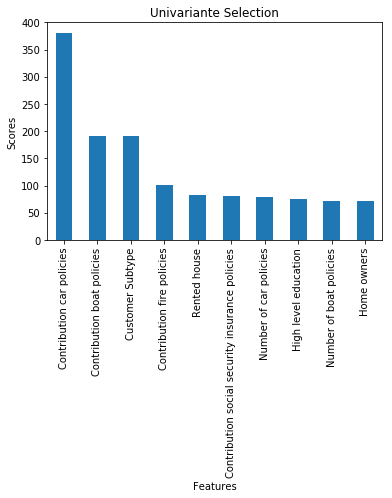

In [48]:
#plotting results
featureScoresPlot = pd.Series(fit.scores_, X.columns)
featureScoresPlot.nlargest(10).plot(kind='bar')
plt.title("Univariante Selection")
plt.ylabel("Scores")
plt.xlabel("Features")
plt.show




In [42]:
# ExtraTreesClassifier - Feature Importance
caravan_model = ExtraTreesClassifier()
tree_fit = caravan_model.fit(X,y)
caravan_model.feature_importances_
feature_importances = pd.Series(caravan_model.feature_importances_, index=X.columns)


In [43]:
# printing out results in table form 
tree_scores = pd.DataFrame(caravan_model.feature_importances_)
tree_columns = pd.DataFrame(X.columns)
treeFeatureScores = pd.concat([tree_columns, tree_scores], axis = 1)
treeFeatureScores.columns = ['Features','Scores']
print(treeFeatureScores.nlargest(10, 'Scores'))


                                      Features    Scores
58                  Contribution fire policies  0.067830
46                   Contribution car policies  0.059455
67                      Number of car policies  0.047722
43  Contribution private third party insurance  0.032615
0                             Customer Subtype  0.031508
79                       Number of re policies  0.026069
42                      Purchasing power class  0.024795
64     Number of private third party insurance  0.022414
4                           Customer main type  0.022362
16                      Medium level education  0.017134


<function matplotlib.pyplot.show>

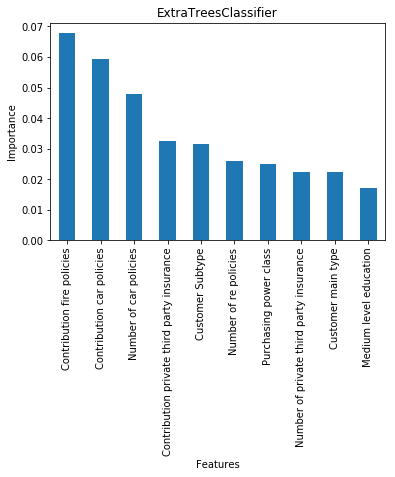

In [44]:
# plotting
feature_importances.nlargest(10).plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("ExtraTreesClassifier")
plt.show



In [22]:
#recursively considering smaller and smaller sets of features.
regression = LogisticRegression(solver='lbfgs')
rfe = RFE(regression, 10)
regression_fit = rfe.fit(X,y)

print("Num Features: %d" % regression_fit.n_features_)
print("Selected Features: %s" % regression_fit.support_)
print("Feature Ranking: %s" % regression_fit.ranking_)

i = 0
while i < len(regression_fit.ranking_):
    if(regression_fit.ranking_[i] == 1):
        print('Feature: ', X.columns[i])
    i+=1
    



Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False  True False False  True False False False False False False
 False False False  True False  True False False False False False False
 False False False  True False False False False False False  True  True
  True  True]
Feature Ranking: [43 39 19 65 23 38 33 72 73 64 27 62 28 60 59 61 71 42 22 55 58  2 44 67
 54 69 76 70 48 74  3  4 29 30 45 26 25 36 35 34 31 20 47 40  1 24  9 12
 63 50  1  8 46  1 37 18 10 14 16  6 66 21 11  1 32  1 77 41 57  7 49 52
 68 13 15  1 17 56 75 51  5 53  1  1  1  1]
('Feature: ', 'Contribution private third party insurance')
('Feature: ', 'Contribution lorry policies')
('Feature: ', 'Contribution agricultural machines poli